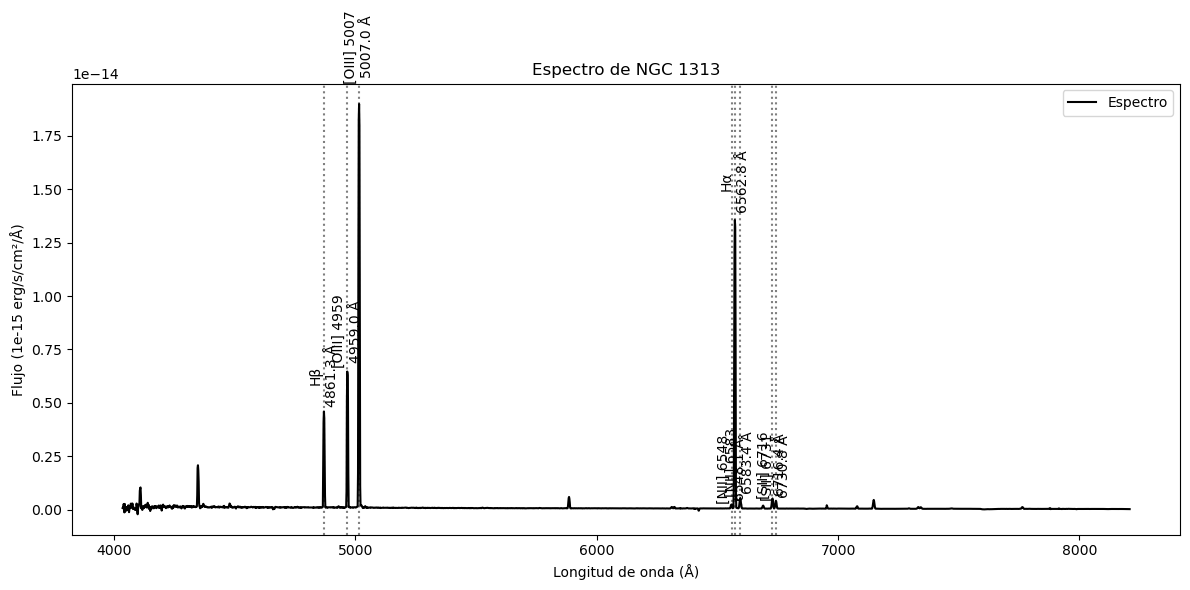

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Definir líneas de emisión con longitudes de onda en reposo (Å)
emission_lines = {
    'Hα': 6562.8,
    'Hβ': 4861.3,
    '[NII] 6548': 6548.1,
    '[NII] 6583': 6583.4,
    '[OIII] 4959': 4959.0,
    '[OIII] 5007': 5007.0,
    '[SII] 6716': 6716.4,
    '[SII] 6731': 6730.8
    # Añade más líneas aquí si es necesario, ej: '[OI] 6300': 6300.0
}

# Corrimiento al rojo de NGC 1313
z = 0.001568

# Ruta al archivo FITS (cámbiala según tu archivo)
fits_file = '../../../belen/reduccion/NGC1313/espectros_oficiales/slit9_1D_c00.fits'

# Cargar el archivo FITS
with fits.open(fits_file) as hdul:
    # Suponiendo que el espectro 1D está en el HDU primario
    data = hdul[0].data
    header = hdul[0].header
    # Calcular longitudes de onda a partir de los encabezados
    wavelength_start = header['CRVAL1']
    wavelength_step = header['CDELT1']
    wavelengths = wavelength_start + wavelength_step * np.arange(len(data))
    # Escalar el flujo por 1e-15 (asumiendo que está en erg/s/cm²/Å originalmente)
    fluxes = data * 1e-15

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, fluxes, color='black', label='Espectro')

# Añadir líneas de emisión ajustadas por corrimiento al rojo
for name, rest_wl in emission_lines.items():
    obs_wl = rest_wl * (1 + z)  # Longitud de onda observada
    if min(wavelengths) <= obs_wl <= max(wavelengths):  # Solo si está en el rango
        plt.axvline(obs_wl, color='black', linestyle=':', alpha=0.5)  # Línea vertical
        idx = np.argmin(np.abs(wavelengths - obs_wl))
        flux_at_line = fluxes[idx]
        # Etiqueta vertical encima de la línea
        plt.text(obs_wl, flux_at_line * 1.05, f'{name}\n{rest_wl} Å',
                 rotation=90, ha='center', va='bottom', color='black')

# Personalizar el gráfico
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo (1e-15 erg/s/cm²/Å)')
plt.title('Espectro de NGC 1313')
plt.legend()
#plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

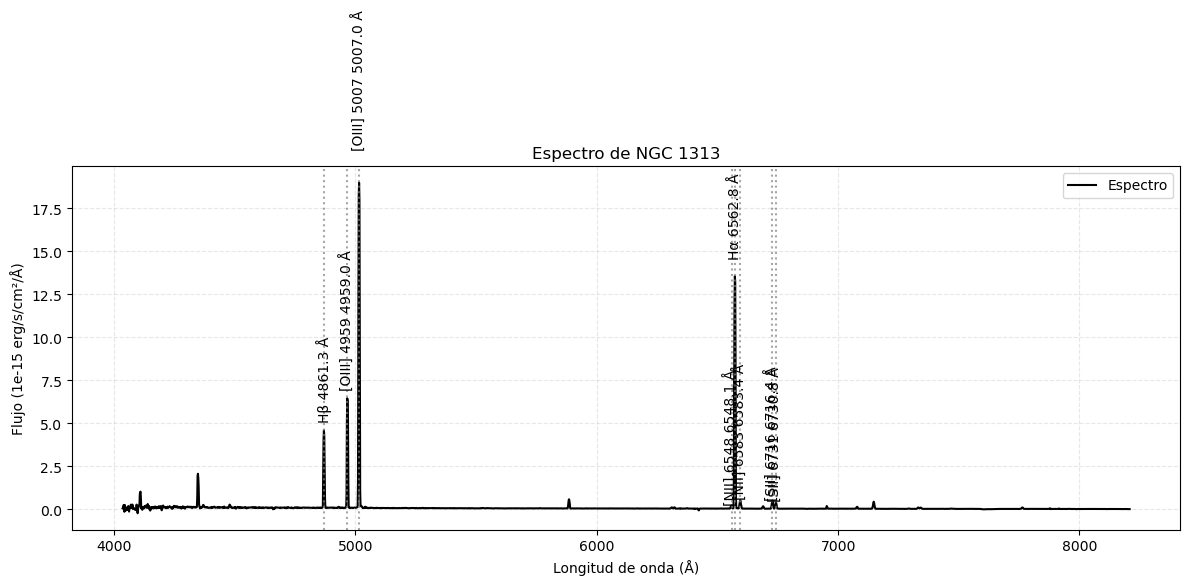

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Definir líneas de emisión con longitudes de onda en reposo (Å)
emission_lines = {
    'Hα': 6562.8,
    'Hβ': 4861.3,
    '[NII] 6548': 6548.1,
    '[NII] 6583': 6583.4,
    '[OIII] 4959': 4959.0,
    '[OIII] 5007': 5007.0,
    '[SII] 6716': 6716.4,
    '[SII] 6731': 6730.8
}

# Corrimiento al rojo de NGC 1313
z = 0.001568

# Ruta al archivo FITS (cámbiala según tu archivo)
fits_file = '../../../belen/reduccion/NGC1313/espectros_oficiales/slit9_1D_c00.fits'

# Cargar el archivo FITS
with fits.open(fits_file) as hdul:
    data = hdul[0].data
    header = hdul[0].header
    wavelength_start = header['CRVAL1']
    wavelength_step = header['CDELT1']
    wavelengths = wavelength_start + wavelength_step * np.arange(len(data))
    # Escalar el flujo por 1e-13 para obtener valores correctos (ej. 17 en vez de 1.7)
    fluxes = data * 1

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, fluxes, color='black', label='Espectro')

# Añadir líneas de emisión ajustadas por corrimiento al rojo
for name, rest_wl in emission_lines.items():
    obs_wl = rest_wl * (1 + z)  # Longitud de onda observada
    if min(wavelengths) <= obs_wl <= max(wavelengths):  # Solo si está en el rango
        plt.axvline(obs_wl, color='gray', linestyle=':', alpha=0.7)  # Línea vertical
        idx = np.argmin(np.abs(wavelengths - obs_wl))
        flux_at_line = fluxes[idx]
        # Combinar nombre y longitud de onda en una sola cadena
        label_text = f"{name} {rest_wl} Å"
        # Posicionar el texto justo encima de la línea, en una sola línea vertical
        plt.text(obs_wl, flux_at_line * 1.1, label_text, 
                 rotation=90, ha='center', va='bottom', color='black')

# Personalizar el gráfico
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo (1e-15 erg/s/cm²/Å)')
plt.title('Espectro de NGC 1313')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

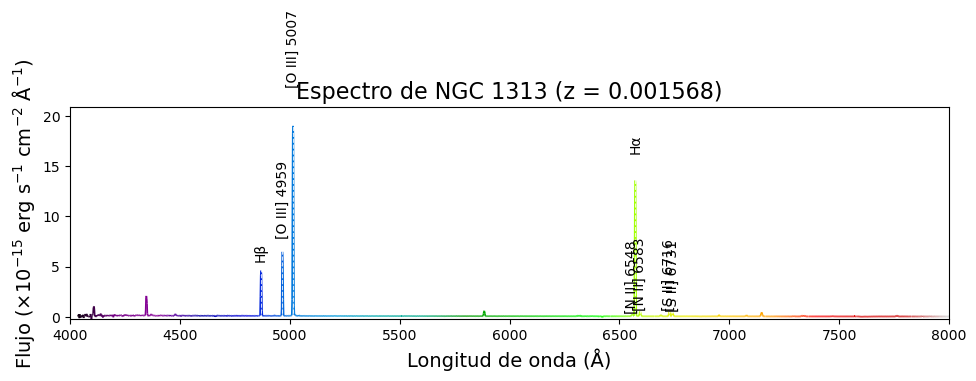

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from astropy.io import fits

# ==== Parámetros ====
fits_file = '../../../belen/reduccion/NGC1313/espectros_oficiales/slit9_1D_c00.fits'
z = 0.001568

lines = {
    'Hβ': 4861.33,
    '[O III] 4959': 4958.91,
    '[O III] 5007': 5006.84,
    'Hα': 6562.80,
    '[N II] 6548': 6548.05,
    '[N II] 6583': 6583.45,
    '[S II] 6716': 6716.44,
    '[S II] 6731': 6730.82
}

# ==== Carga del espectro ====
hdul = fits.open(fits_file)
hdr  = hdul[0].header
flux = hdul[0].data.astype(float)
hdul.close()

# Construcción de eje λ
n_pix = flux.size
crval = hdr['CRVAL1']
cdelt = hdr['CDELT1']
crpix = hdr.get('CRPIX1', 1)
pix   = np.arange(n_pix)
wave  = (pix + 1 - crpix) * cdelt + crval

# ==== Preparamos la colección de líneas coloreadas ====
# Creamos segmentos (x0,y0)->(x1,y1)
points   = np.array([wave, flux]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalización del rango de colores de 4000 a 8000 Å
norm = plt.Normalize(4000, 8000)

# Elegimos un colormap “iris” aproximado
cmap = plt.get_cmap('nipy_spectral')  # colorido parecido al arco iris

lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=1.2)
lc.set_array(wave)

# ==== Dibujamos ====
fig, ax = plt.subplots(figsize=(10,4))
ax.add_collection(lc)
ax.set_xlim(4000, 8000)
ax.set_ylim(flux.min()*1.1, flux.max()*1.1)

ax.set_xlabel('Longitud de onda (Å)', fontsize=14)
ax.set_ylabel(r'Flujo (×10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', fontsize=14)
ax.set_title(f'Espectro de NGC 1313 (z = {z:.6f})', fontsize=16)

# Etiquetado de líneas
for name, rest_wl in lines.items():
    obs_wl = rest_wl * (1 + z)
    if 4000 < obs_wl < 10000:
        ax.axvline(obs_wl, color='white', ls='--', lw=0.8, alpha=0.8)
        y_peak = flux[(wave>obs_wl-5)&(wave<obs_wl+5)].max()
        ax.text(obs_wl, y_peak*1.2, name,
                rotation=90, va='bottom', ha='center', fontsize=10,
                color='black', alpha=1.0)

plt.tight_layout()
plt.show()
